# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import missingno as msno
os.chdir('') 
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')


# Loading Data 

In [2]:
df = pd.read_csv("laptop_price.csv" , sep = "," , encoding = 'latin-1')
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


# EDA 

In [3]:
df.columns


Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
df.shape

(1303, 13)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1303 entries, 0 to 1302

Data columns (total 13 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   laptop_ID         1303 non-null   int64  

 1   Company           1303 non-null   object 

 2   Product           1303 non-null   object 

 3   TypeName          1303 non-null   object 

 4   Inches            1303 non-null   float64

 5   ScreenResolution  1303 non-null   object 

 6   Cpu               1303 non-null   object 

 7   Ram               1303 non-null   object 

 8   Memory            1303 non-null   object 

 9   Gpu               1303 non-null   object 

 10  OpSys             1303 non-null   object 

 11  Weight            1303 non-null   object 

 12  Price_euros       1303 non-null   float64

dtypes: float64(2), int64(1), object(10)

memory usage: 132.5+ KB


In [6]:
duplicate = df.duplicated().any()
duplicate


False

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### We don't have any null or duplicate values , amazing!

# Visualization and preprocessing 

#### dropping laptop_id 

In [9]:
df.drop(columns=['laptop_ID'], inplace=True)


### Renaming price_euros column

In [10]:
df.rename(columns = {'Price_euros':'Price'}, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1303 entries, 0 to 1302

Data columns (total 12 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   Company           1303 non-null   object 

 1   Product           1303 non-null   object 

 2   TypeName          1303 non-null   object 

 3   Inches            1303 non-null   float64

 4   ScreenResolution  1303 non-null   object 

 5   Cpu               1303 non-null   object 

 6   Ram               1303 non-null   object 

 7   Memory            1303 non-null   object 

 8   Gpu               1303 non-null   object 

 9   OpSys             1303 non-null   object 

 10  Weight            1303 non-null   object 

 11  Price             1303 non-null   float64

dtypes: float64(2), object(10)

memory usage: 122.3+ KB


In [12]:
df["Ram"].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [13]:
#### Removing GB and conerting it to numeric 

In [14]:
df['Ram'] = df['Ram'].str.replace("GB",'')
df['Ram'] = df['Ram'].astype('int64')
df.rename(columns = {'Ram':'Ram(GB)'}, inplace = True)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


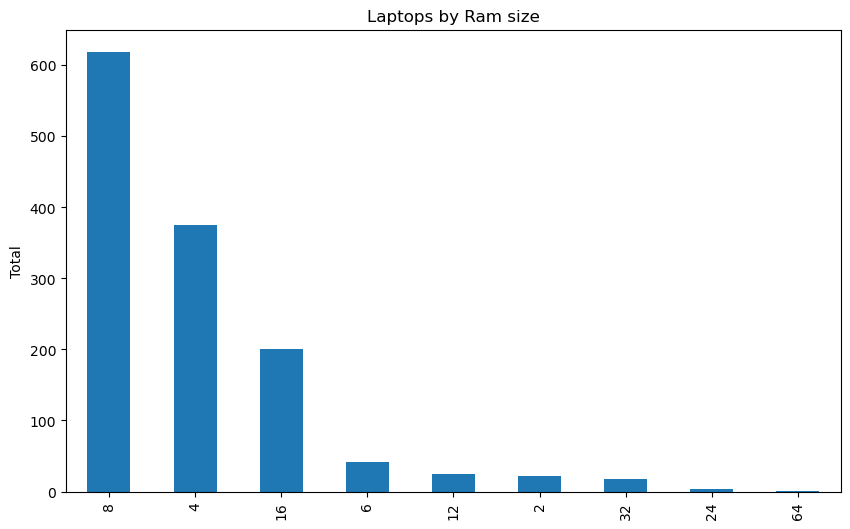

In [15]:
s = df['Ram(GB)'].value_counts()
plt.figure(figsize=(10,6))

s.plot(kind='bar')
plt.ylabel('Total')
plt.title('Laptops by Ram size')
plt.show()

#### 8 Ram GB laptops is the most sold 

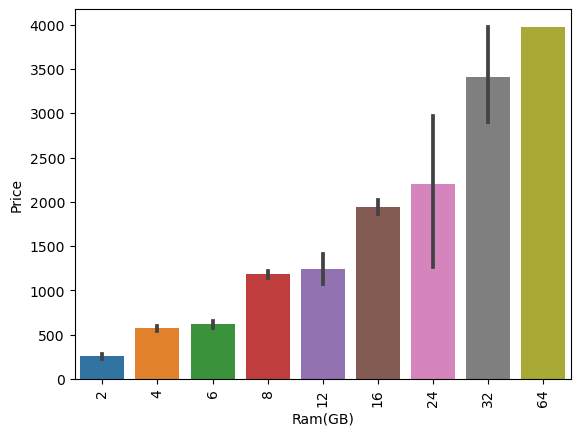

In [16]:
sns.barplot(x=df['Ram(GB)'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### 64 GB  Ram is the most expensive 

In [17]:
df["Weight"].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: Weight, Length: 179, dtype: int64

#### Removing Kg and converting it to numeric 

In [18]:
df['Weight'] = df['Weight'].str.replace("kg",'')
df['Weight'] = df['Weight'].astype('float64')
df.rename(columns = {'Weight':'Weight(Kg)'}, inplace = True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


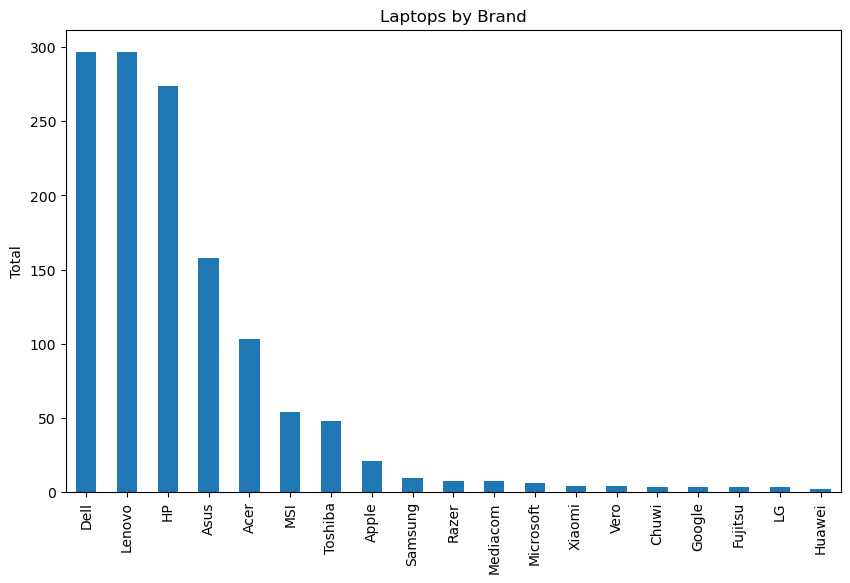

In [19]:
s = df['Company'].value_counts()
plt.figure(figsize=(10,6))

s.plot(kind='bar')
plt.ylabel('Total')
plt.title('Laptops by Brand')
plt.show()

#### Dell and LENOVO ARE THE 2 MOST SOLD BRANDS 

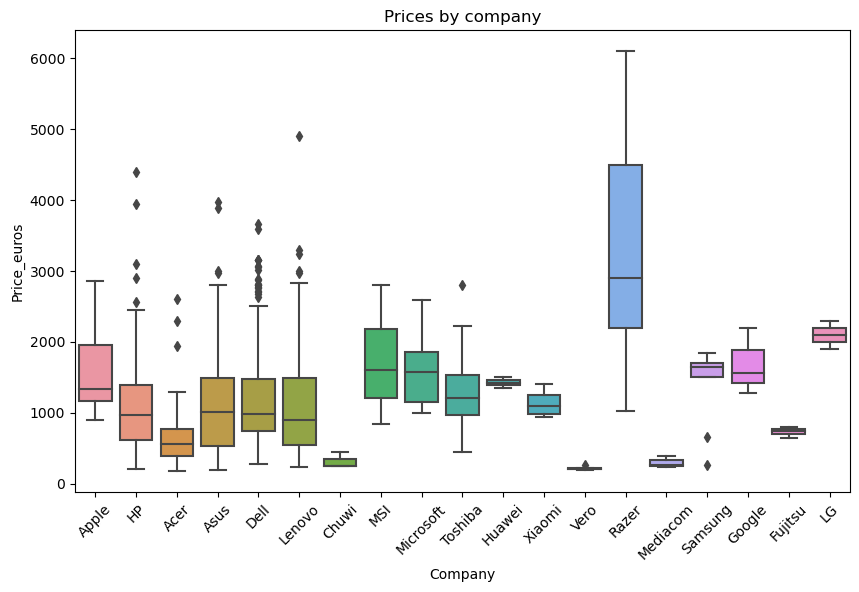

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Company", y="Price", data=df)
plt.xlabel("Company")
plt.ylabel("Price_euros")
plt.title("Prices by company")
plt.xticks(rotation=45)
plt.show()




#### Razer is the most expensive brand 

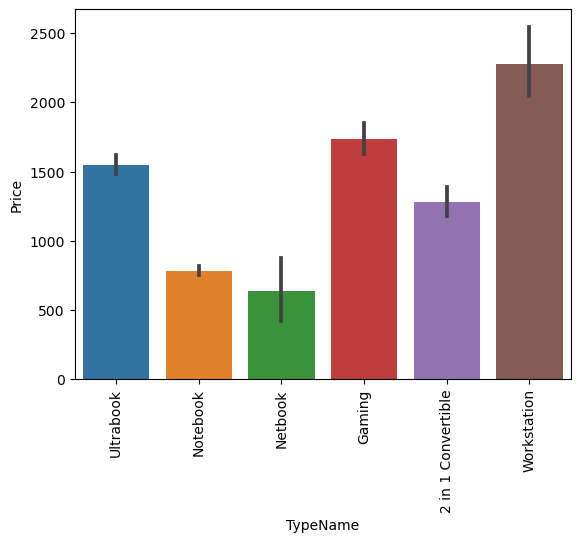

In [21]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Workstation laptops are the most expensive 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

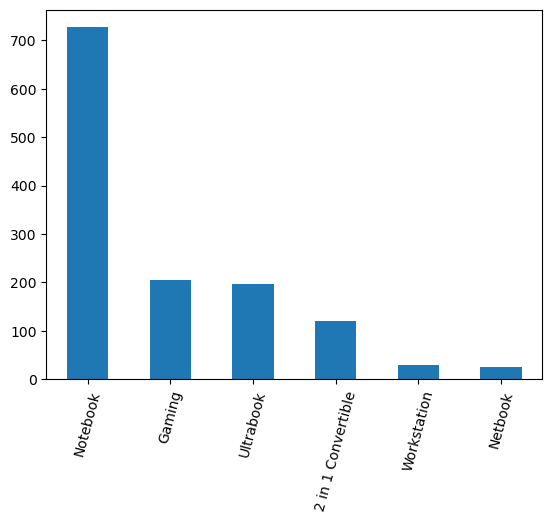

In [22]:
df['TypeName'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = '75')

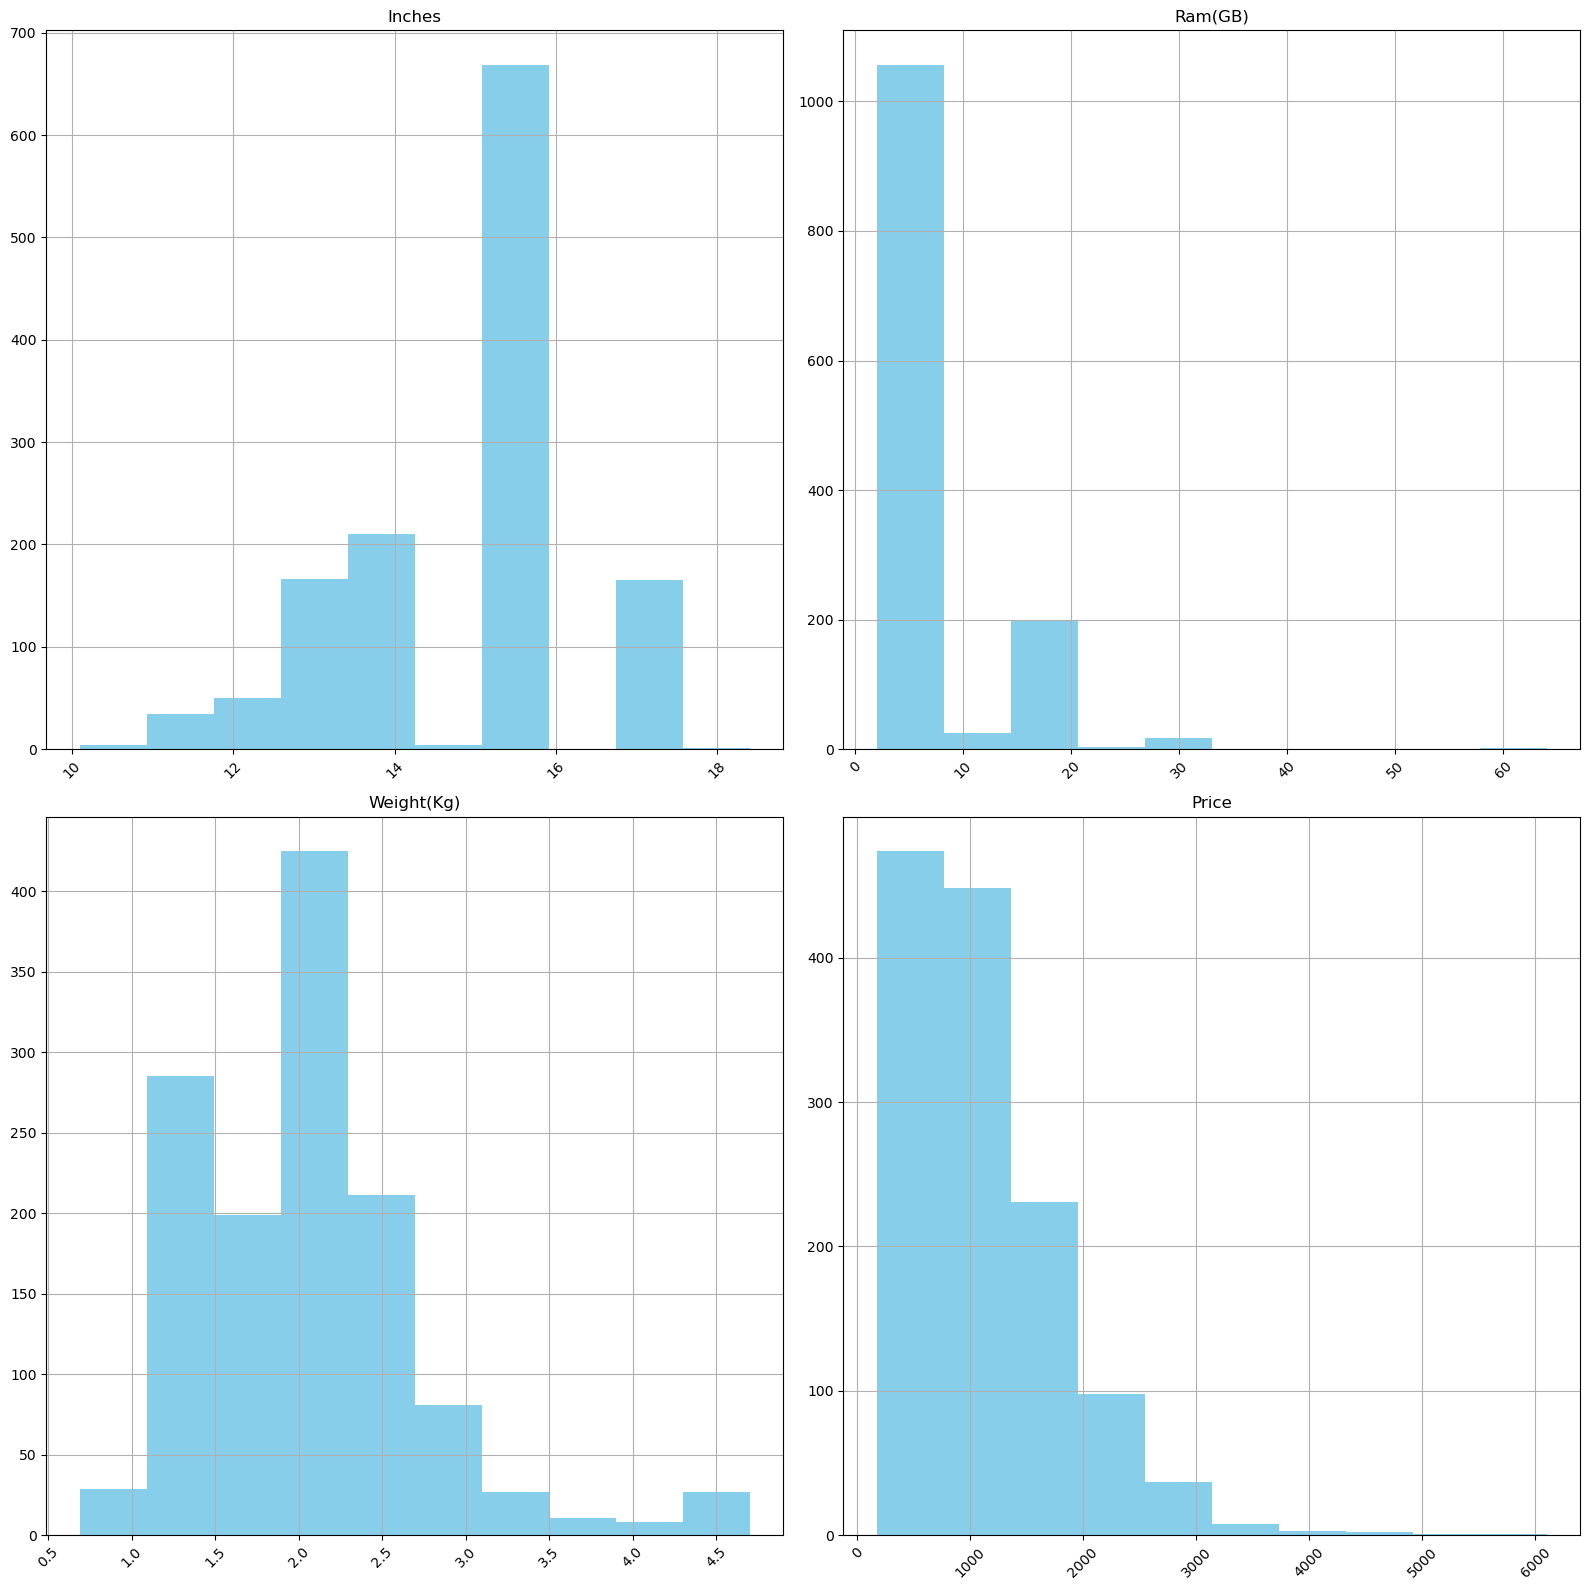

In [23]:
df.hist(figsize=(16,16),xrot=45,color='skyblue')
plt.tight_layout()
plt.show()

In [24]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [25]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

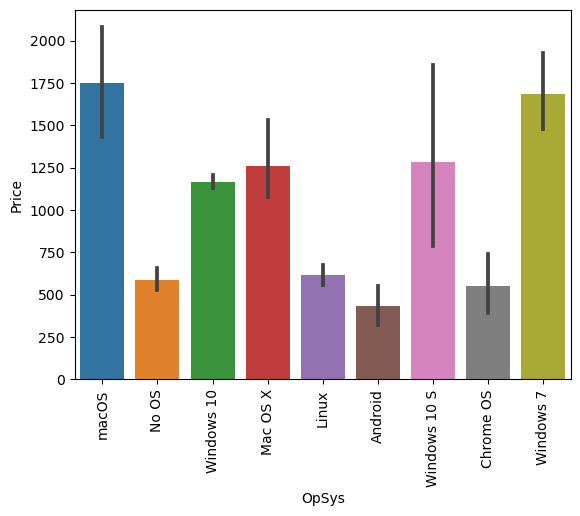

In [26]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Encoding categorical columns 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1303 entries, 0 to 1302

Data columns (total 12 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   Company           1303 non-null   object 

 1   Product           1303 non-null   object 

 2   TypeName          1303 non-null   object 

 3   Inches            1303 non-null   float64

 4   ScreenResolution  1303 non-null   object 

 5   Cpu               1303 non-null   object 

 6   Ram(GB)           1303 non-null   int64  

 7   Memory            1303 non-null   object 

 8   Gpu               1303 non-null   object 

 9   OpSys             1303 non-null   object 

 10  Weight(Kg)        1303 non-null   float64

 11  Price             1303 non-null   float64

dtypes: float64(3), int64(1), object(8)

memory usage: 122.3+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
columns_to_encode = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 
                     'OpSys', 'Gpu', ]

label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1303 entries, 0 to 1302

Data columns (total 12 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   Company           1303 non-null   int32  

 1   Product           1303 non-null   int32  

 2   TypeName          1303 non-null   int32  

 3   Inches            1303 non-null   float64

 4   ScreenResolution  1303 non-null   int32  

 5   Cpu               1303 non-null   int32  

 6   Ram(GB)           1303 non-null   int64  

 7   Memory            1303 non-null   int32  

 8   Gpu               1303 non-null   int32  

 9   OpSys             1303 non-null   int32  

 10  Weight(Kg)        1303 non-null   float64

 11  Price             1303 non-null   float64

dtypes: float64(3), int32(8), int64(1)

memory usage: 81.6 KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,1303.0,6.442824,4.084128,0.00,4.0,7.00,10.00,18.0
Product,1303.0,308.207214,171.887833,0.00,182.5,291.00,455.50,617.0
TypeName,1303.0,2.582502,1.245231,0.00,1.5,3.00,3.00,5.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
ScreenResolution,1303.0,9.224098,7.885050,0.00,6.0,8.00,15.00,39.0
Cpu,1303.0,76.983883,25.190467,0.00,65.0,78.00,97.00,117.0
Ram(GB),1303.0,8.382195,5.084665,2.00,4.0,8.00,8.00,64.0
Memory,1303.0,16.345357,8.008281,0.00,10.0,16.00,23.00,38.0
Gpu,1303.0,54.682272,21.623195,0.00,46.0,53.00,72.00,109.0
OpSys,1303.0,4.808903,1.035253,0.00,5.0,5.00,5.00,8.0


In [33]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


# Split data 

In [34]:
from sklearn.model_selection import train_test_split 

In [36]:
x=df.drop(['Price'],axis=1).values
y=df['Price'].values

In [37]:
x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=.25,random_state=42)

In [38]:
x.shape

(1303, 11)

In [39]:
y.shape

(1303,)

In [40]:
x_train.shape

(977, 11)

In [41]:
x_test.shape

(326, 11)

In [42]:
y_train

array([ 659.  , 2171.72,  959.  ,  799.  , 1499.  , 1049.9 , 1900.  ,
        415.  , 1011.99, 1650.  , 1799.  , 1199.  , 1181.27, 1925.  ,
        449.  , 2382.  ,  598.9 ,  397.  , 3072.89,  789.01,  819.  ,
       1199.  ,  369.  ,  749.  , 1335.  , 2505.02,  196.  , 1119.  ,
        399.  ,  928.  ,  649.  , 1349.  ,  699.  ,  544.15, 1142.  ,
        239.  , 1599.  , 1090.  ,  999.  , 1334.  ,  970.9 ,  499.  ,
        489.  ,  818.35,  269.  , 1116.02,  691.  ,  529.  , 2299.  ,
        699.  ,  909.  , 1908.  , 2456.34, 2559.  ,  812.  ,  902.  ,
        778.87,  292.  , 1280.  , 1799.  , 1034.  , 1224.  , 1258.  ,
       2899.  , 3659.4 ,  788.49, 1962.99,  559.  , 1008.52, 1135.  ,
        568.9 ,  629.  , 1159.  , 2590.  ,  589.  , 2445.  , 3299.  ,
       1228.99,  729.  ,  879.  ,  244.99,  889.  , 1099.99, 1475.  ,
        252.36,  999.  , 1199.  , 1329.  , 1260.  ,  297.  ,  899.  ,
        498.  , 2537.45, 1379.  ,  999.  ,  435.  ,  229.  ,  685.  ,
       1849.  ,  553

In [43]:
y_test

array([1672.  , 1149.  ,  499.  ,  899.  , 1244.  , 1398.99,  719.  ,
        459.  , 1191.  ,  349.  , 1899.  ,  726.  , 1813.  ,  805.99,
       1949.  ,  899.  , 1145.  ,  961.  ,  713.07, 1649.  , 2349.  ,
        720.32,  798.01,  265.  , 1149.  ,  999.  ,  959.  ,  825.  ,
       2277.  , 1179.  ,  459.  , 1725.  , 1969.  ,  959.  ,  943.  ,
        745.  ,  659.01,  399.  , 1229.  ,  330.  , 1867.85,  519.  ,
        739.  , 2289.99,  547.  , 1377.  , 1983.  ,  279.  ,  795.  ,
       1458.  , 1499.  ,  629.  , 1199.  , 1099.99,  557.37, 1026.  ,
        249.  ,  819.  ,  941.  ,  899.  , 1749.  ,  841.  ,  403.5 ,
        682.  ,  299.  , 2049.9 ,  529.  ,  949.  , 1094.  , 1279.  ,
       2799.  , 1119.  ,  530.  ,  806.  ,  309.  ,  469.  ,  639.01,
       1993.  , 1599.  , 1499.  , 1399.  ,  615.  ,  349.  ,  713.99,
        278.  , 2051.  ,  439.  , 2999.  ,  989.  ,  819.  , 1510.  ,
       3240.  ,  809.  ,  726.  , 1474.  ,  426.  ,  859.  ,  716.  ,
        784.  , 1049

# data scaling 

In [44]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [45]:
x_train.shape


(977, 11)

# Linear Regression 

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
le=LinearRegression()

In [48]:
le.fit(x_train,y_train)

LinearRegression()

In [49]:
le.score(x_train,y_train)

0.6836961639858254

In [50]:
le.score(x_test,y_test)

0.6319619109847983

In [51]:
le.coef_

array([  54.51488393,   39.36228862,   38.2786074 , -126.76384094,
         80.65314522,  150.92790035,  332.81233332,   68.66410771,
        106.35013627,  105.74194297,   85.96745241])

In [52]:
le.intercept_

1074.2144590192236

In [55]:
pd.DataFrame(le.coef_ , df.columns[:-1] , columns = ["coefficient"])

,coefficient
Company,54.514884
Product,39.362289
TypeName,38.278607
Inches,-126.763841
ScreenResolution,80.653145
Cpu,150.927900
Ram(GB),332.812333
Memory,68.664108
Gpu,106.350136
OpSys,105.741943


In [56]:
y_pred = le.predict(x_test)
y_pred

array([1277.64358025, 1217.56529434,  382.70951094, 1395.19696325,
        724.4235207 , 1235.11708898,  701.01126673,  887.62638563,
       1268.33809878,  307.03589387, 2066.33386503,  709.59853758,
       1370.11360126,  619.48162197, 1867.38559723, 1311.01703883,
       1390.41916818, 1226.2884069 , 1380.7392223 , 1970.47924346,
       2029.51571215,  839.17158377, 1134.55307876,  678.66129375,
       1192.35093433, 1280.87732235,  671.79878876,  647.54244923,
       1044.8905184 , 1024.60547943,  682.68204608, 1375.50170903,
       1301.88424416,  981.60718286, 1218.05822638, 1332.81778118,
       1131.63031597,  254.48023703, 1230.15240782, -171.05789232,
       1770.43211854, 1008.60533536, 1215.06252781, 2103.86432674,
        523.1712776 , 1029.80988979, 2023.51091034,  347.98162298,
       1084.08107432, 1307.59297191, 1241.85646286,  481.2217283 ,
       1323.23681466,  627.45198034, 1365.63502548, 1375.3356299 ,
        347.8031092 , 1157.0372261 , 1171.38838041, 1395.19696

In [57]:
new1 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
new1.head(10)

,Y_test,Y_predict
0,1672.00,1277.643580
1,1149.00,1217.565294
2,499.00,382.709511
3,899.00,1395.196963
4,1244.00,724.423521
5,1398.99,1235.117089
6,719.00,701.011267
7,459.00,887.626386
8,1191.00,1268.338099
9,349.00,307.035894


# Evaluating 

In [58]:
from sklearn.metrics import r2_score
reg_score = r2_score(y_test , y_pred)
reg_score

0.6319619109847983

In [59]:
p = x_train.shape[1]
n = len(y_train)
adj_R2 = 1 - (reg_score) * (n - 1) / (n - p - 1)
adj_R2


0.3608343781127844

In [60]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [61]:
mape = mean_absolute_percentage_error(y_test , y_pred)
mape

0.3339267429368214

In [62]:
mae = mean_absolute_error(y_test , y_pred)
mae

308.5159604635446

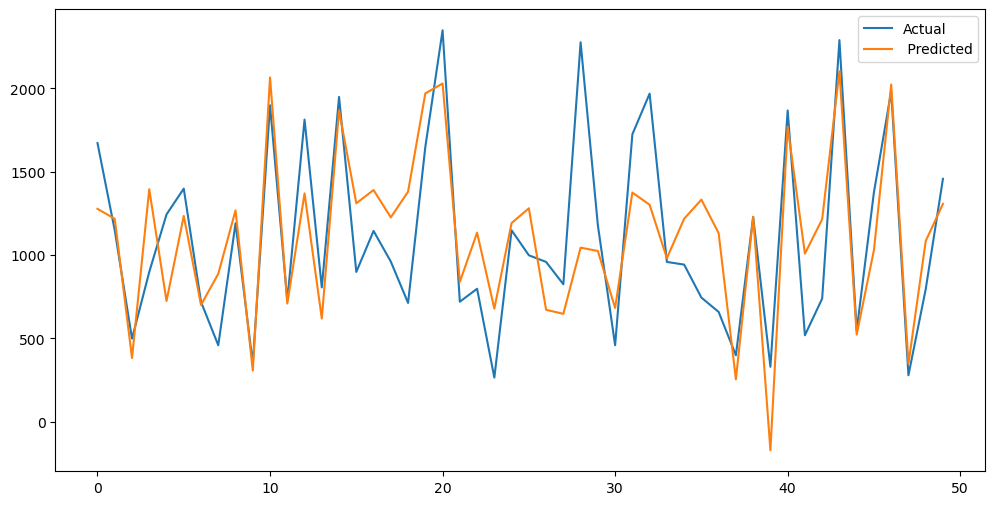

In [63]:
plt.figure(figsize= (12,6))
plt.plot(new1[:50])
plt.legend(["Actual" , " Predicted"])

In [64]:
import statsmodels.api as sm
x2 = sm.add_constant(x)
est = sm.OLS(y , x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            


Dep. Variable:                      y   R-squared:                       0.673

Model:                            OLS   Adj. R-squared:                  0.670

Method:                 Least Squares   F-statistic:                     241.4

Date:                Mon, 21 Aug 2023   Prob (F-statistic):          8.22e-304

Time:                        21:46:14   Log-Likelihood:                -9654.6

No. Observations:                1303   AIC:                         1.933e+04

Df Residuals:                    1291   BIC:                         1.940e+04

Df Model:                          11                                         

Covariance Type:            nonrobust                                         


                 coef    std err          t      P>|t|      [0.025      0.975]

------------------------------------------------------------------------------

const        -48.8533    183.858     -

In [65]:
print(est2.rsquared_adj)

0.6700808013892077


  ## Ridge regression

In [66]:
from sklearn.linear_model import RidgeCV

In [67]:
rid = RidgeCV(alphas = 0.5)

In [68]:
rid.fit(x_train,y_train)


RidgeCV(alphas=array(0.5))

In [69]:
rid.score(x_train,y_train)

0.683696002552963

In [70]:
rid.score(x_test , y_test)

0.6319978919066805

In [71]:
rid.coef_

array([  54.44297684,   39.3290982 ,   38.19393142, -126.29949003,
         80.69061527,  150.80116438,  332.74186409,   68.63586725,
        106.38634921,  105.71922634,   85.47373741])

In [72]:
rid.intercept_

1074.3342641737795

In [73]:
pd.DataFrame(rid.coef_ , df.columns[:-1] , columns = ["coeficient"])

,coeficient
Company,54.442977
Product,39.329098
TypeName,38.193931
Inches,-126.299490
ScreenResolution,80.690615
Cpu,150.801164
Ram(GB),332.741864
Memory,68.635867
Gpu,106.386349
OpSys,105.719226


## Lasso Regression

In [74]:
from sklearn.linear_model import LassoLars

In [75]:
rid = LassoLars()

In [76]:
rid.fit(x_train,y_train)

LassoLars()

In [77]:
rid.score(x_train,y_train)

0.6683418867847101

In [78]:
rid.score(x_test , y_test)

0.6288307889755467

In [79]:
rid.coef_

array([ 15.10299595,  15.71249431,   0.        , -36.78611121,
        67.68522094, 130.25935872, 325.07989931,  36.47114617,
        83.41918283,  90.11773113,   0.        ])

In [80]:
rid.intercept_

1090.4747685373384

In [81]:
pd.DataFrame(rid.coef_ , df.columns[:-1] , columns = ["coeficient"])

,coeficient
Company,15.102996
Product,15.712494
TypeName,0.000000
Inches,-36.786111
ScreenResolution,67.685221
Cpu,130.259359
Ram(GB),325.079899
Memory,36.471146
Gpu,83.419183
OpSys,90.117731


# Trying non linear model 

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf = RandomForestRegressor(max_depth= 4 , max_features= 6)

In [84]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, max_features=6)

In [85]:
rf.score(x_train,y_train)

0.7855444580148145

In [86]:
rf.score(x_test , y_test)

0.7318652237926835

In [87]:
y_pred = rf.predict(x_test)
y_pred

array([1359.38522478, 1368.21087564,  478.42608802, 1164.62063024,
       1028.58860091, 1410.43290563,  610.95150919,  818.28994556,
       1165.38126944,  449.82650701, 1821.24126104, 1005.72986363,
       1377.56666371,  943.34228962, 1772.06696686, 1230.5735059 ,
       1377.31395681, 1119.60032285,  963.82539614, 1870.82530084,
       2240.00741066,  723.66015277, 1239.65031949,  417.38245892,
       1228.85692314, 1115.62058704,  678.21199896,  683.68737891,
       1397.60076086, 1050.95596887,  520.88075274, 1398.83098783,
       1421.69119948, 1054.60811693, 1037.8514476 , 1174.8006286 ,
       1092.80447815,  465.84558585, 1198.53475145,  361.96276844,
       1391.608187  , 1016.4248153 , 1021.8911427 , 2246.05751423,
        516.31975657, 1050.95596887, 1821.24126104,  355.5896846 ,
       1047.45645997, 1382.19915933, 1357.50164898,  777.31923428,
       1247.39019443,  947.64843983, 1030.55602445, 1349.62568399,
        355.5896846 , 1236.43960115, 1359.39292779, 1164.62063

In [88]:
new2 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
new2.head(10)

,Y_test,Y_predict
0,1672.00,1359.385225
1,1149.00,1368.210876
2,499.00,478.426088
3,899.00,1164.620630
4,1244.00,1028.588601
5,1398.99,1410.432906
6,719.00,610.951509
7,459.00,818.289946
8,1191.00,1165.381269
9,349.00,449.826507


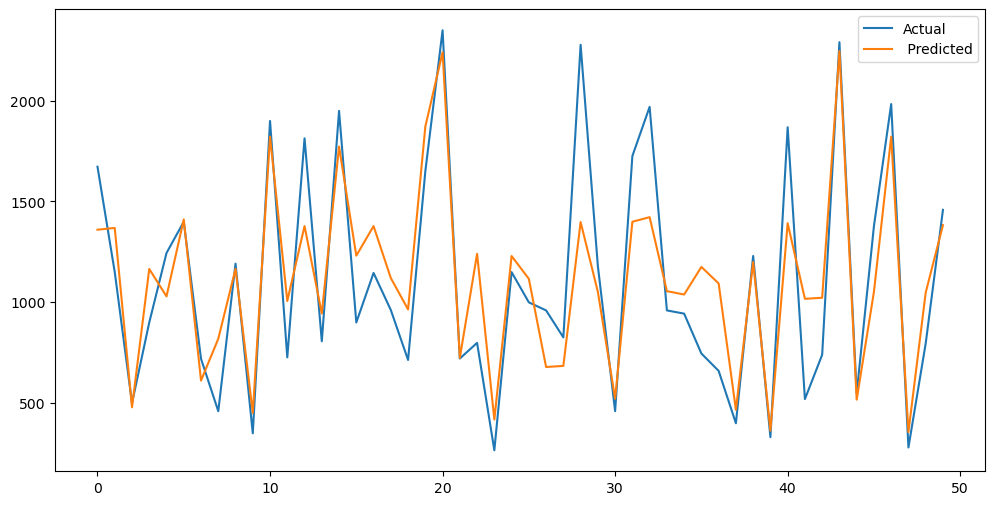

In [89]:
plt.figure(figsize= (12,6))
plt.plot(new2[:50])
plt.legend(["Actual" , " Predicted"])

In [90]:
from sklearn.metrics import r2_score
ran_score = r2_score(y_test , y_pred)
ran_score

0.7318652237926835

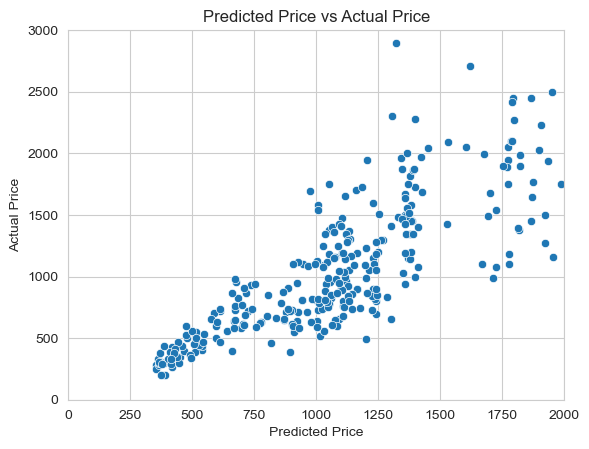

In [91]:
tips = sns.load_dataset("tips")
sns.set_style("whitegrid")
fig = sns.scatterplot( x= y_pred, y= y_test,data=new2)
fig = fig.set(xlim=(0,2000),ylim=(0,3000))
plt.title("Predicted Price vs Actual Price")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show(fig)

##  Building random forest model with best porameters 

In [92]:
model_rf = RandomForestRegressor(max_depth=30, n_estimators=80)
model_rf.fit(x_train,y_train)
model_rf.score(x_test,y_test)

0.8012740207717093

In [93]:
y_pred = model_rf.predict(x_test)
y_pred

array([1365.4175    , 1450.077375  ,  545.536625  ,  944.38625   ,
       1220.02925   , 1582.061875  ,  716.886     ,  521.65875   ,
       1268.1136875 ,  386.37425   , 1845.26933333,  987.006625  ,
       1442.90375   ,  768.11825   , 1889.86616667, 1143.04525   ,
       1548.322375  , 1494.793625  ,  759.914625  , 1843.52775   ,
       2541.310875  ,  721.56375   , 1235.655125  ,  379.09977083,
       1127.77      , 1149.706125  ,  575.016375  ,  579.016375  ,
       1501.991875  , 1007.063375  ,  501.00875   , 1758.221     ,
       1740.045875  , 1156.811875  , 1163.576375  ,  765.4365    ,
        816.899     ,  439.342375  , 1281.95525   ,  253.857375  ,
       1600.025     ,  695.258     , 1426.012125  , 2178.0885    ,
        508.393125  , 1037.26      , 1725.1985    ,  220.591125  ,
       1147.746625  , 1484.5774    , 1714.64875   ,  602.92475   ,
        980.39125   , 1142.744125  , 1052.014875  , 1284.196625  ,
        220.591125  , 1135.345875  , 1271.70125   ,  944.38625

In [94]:
new3 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
new3.head(10)

,Y_test,Y_predict
0,1672.00,1365.417500
1,1149.00,1450.077375
2,499.00,545.536625
3,899.00,944.386250
4,1244.00,1220.029250
5,1398.99,1582.061875
6,719.00,716.886000
7,459.00,521.658750
8,1191.00,1268.113687
9,349.00,386.374250


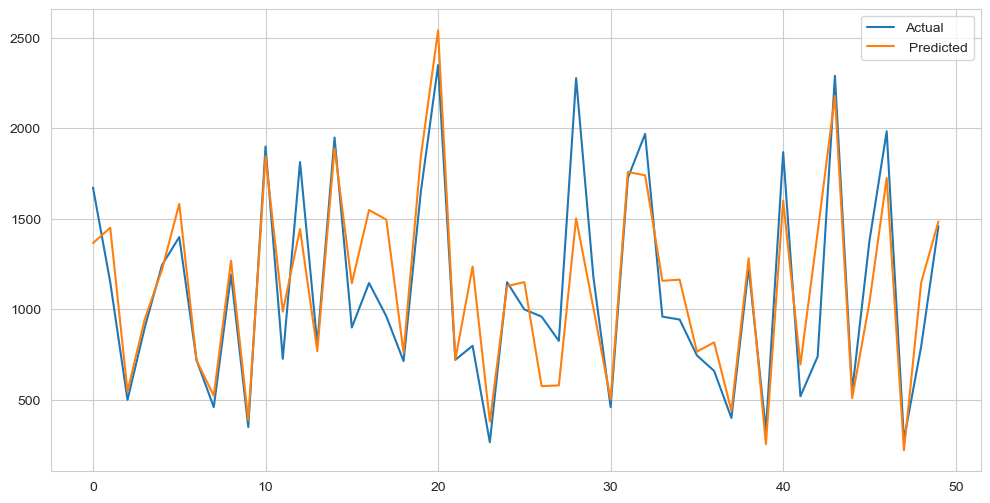

In [95]:
plt.figure(figsize= (12,6))
plt.plot(new3[:50])
plt.legend(["Actual" , " Predicted"])

#### I tried removing outliers , but this gives a better accuracy with keeping them .

# Thank you 